# A/B TESTING ANALYSIS
## Marketing Campaign Effectiveness Study

---

### Project Overview
This notebook contains a comprehensive A/B testing analysis to evaluate the effectiveness of a marketing advertising campaign. We compare two groups: users who saw **advertisements** versus users who saw **Public Service Announcements (PSA)** to determine if ads significantly increase product purchases.

**Analysis Date:** January 2026  
**Analyst:** Data Science Team  
**Status:** Complete Analysis

---

## 1. The Concept

### Business Problem
Marketing companies invest heavily in advertising campaigns, but need to quantify the actual impact of these ads on customer conversions. We need to answer two critical questions:

1. **Would the campaign be successful?**
2. **If successful, how much of that success can be attributed to the ads?**

### The Solution: A/B Testing
To isolate the effect of advertisements, we conducted a randomized controlled experiment:
- **Treatment Group (Ad)**: Majority of users exposed to product advertisements
- **Control Group (PSA)**: Small portion of users shown Public Service Announcements instead

Both groups saw content in the exact same size and placement, eliminating confounding variables and allowing us to measure the true causal effect of advertising.

---

## 2. Hypothesis

### Research Question
**Does exposure to product advertisements increase the likelihood of purchase compared to neutral Public Service Announcements?**

### Formal Hypothesis

**Null Hypothesis (H₀):**
> The conversion rate for users who saw ads is **equal to** the conversion rate for users who saw PSA
> 
> **H₀: p_ad = p_psa**

**Alternative Hypothesis (H₁):**
> The conversion rate for users who saw ads is **greater than** the conversion rate for users who saw PSA
> 
> **H₁: p_ad > p_psa**

### Success Criteria
- **Primary Metric:** Conversion Rate (% of users who purchased)
- **Statistical Significance Level:** α = 0.05 (95% confidence)
- **Minimum Detectable Effect:** We want to detect any meaningful lift in conversion rate
- **Expected Outcome:** Ads should show a statistically significant increase in conversions

---

## 3. Test Design & Methodology

### Experiment Setup

| Parameter | Details |
|-----------|---------|
| **Test Type** | Two-sample proportion test (Ad vs PSA) |
| **Randomization** | Users randomly assigned to ad or psa group |
| **Sample Size** | ~588,000 total users |
| **Test Duration** | Campaign period (exact dates in data) |
| **Treatment** | Product advertisements |
| **Control** | Public Service Announcements (PSA) |

### Variables Collected

**Primary Variables:**
- `user_id`: Unique identifier for each user
- `test_group`: Assignment to 'ad' or 'psa' group
- `converted`: Whether user made a purchase (True/False)

**Secondary Variables (for deeper analysis):**
- `total_ads`: Number of ads/PSAs shown to user
- `most_ads_day`: Day of week with highest ad exposure
- `most_ads_hour`: Hour of day with highest ad exposure

### Analysis Plan

1. **Exploratory Data Analysis (EDA)**
   - Check test group balance
   - Examine conversion distributions
   - Explore temporal patterns

2. **Statistical Testing**
   - Two-proportion z-test
   - Chi-square test of independence
   - Calculate effect size (Cohen's h)
   - Compute confidence intervals

3. **Deep Dive Analysis**
   - Ad exposure impact on conversion
   - Temporal patterns (day/hour analysis)
   - Segmentation insights

4. **Business Recommendations**
   - Implementation decision
   - Optimization strategies

---

## 4. Expected Results & Business Impact

### What We Expect to See

If advertisements are effective, we anticipate:

- **Higher conversion rate** in the ad group compared to PSA group  
- **Statistically significant difference** (p-value < 0.05)  
- **Meaningful effect size** (Cohen's h > 0.2)  
- **Positive ROI** when comparing ad costs to incremental revenue

### Key Business Questions to Answer

1. **Is the difference statistically significant?**
   - Can we confidently say ads cause increased conversions?

2. **What is the practical significance?**
   - How much lift do ads provide? (Relative % increase)

3. **What is the optimal strategy?**
   - How many ads should we show?
   - When should we show them? (best days/hours)

4. **Should we implement the campaign?**
   - Does the benefit justify the cost?

### Decision Framework

| Outcome | Decision |
|---------|----------|
| **p < 0.05 AND Effect Size > 0.2** | **Implement campaign** - Strong evidence of effectiveness |
| **p < 0.05 BUT Effect Size < 0.2** | **Consider carefully** - Significant but small effect |
| **p ≥ 0.05** | **Do not implement** - No significant evidence of effectiveness |

---

## Analysis Begins Below

In [1]:
# ============================================================================
# SETUP: Import Libraries and Configure Settings
# ============================================================================

# Data manipulation
import pandas as pd
import numpy as np

# Visualization - Static plots
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization - Interactive plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Statistical analysis
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Configuration
import warnings
warnings.filterwarnings('ignore')

# Set visualization style for professional plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Set plotly template for consistent styling
pio.templates.default = "plotly_white"

print("All libraries imported successfully!")
print("Configuration complete!")
print("\n" + "="*70)
print("Ready to begin analysis...")
print("="*70)

All libraries imported successfully!
Configuration complete!

Ready to begin analysis...


In [2]:
# ============================================================================
# HELPER FUNCTIONS FOR OPTIMIZED CODE
# ============================================================================

def create_plotly_layout(title, xaxis_title, yaxis_title, width=700, height=500, **custom):
    """
    Create standardized Plotly layout for consistent styling.
    Reduces code duplication and ensures visual consistency.
    
    Parameters:
    -----------
    title : str - Plot title
    xaxis_title : str - X-axis label
    yaxis_title : str - Y-axis label  
    width : int - Plot width in pixels
    height : int - Plot height in pixels
    **custom : Additional layout parameters to override defaults
    """
    layout = {
        'title': {'text': title, 'x': 0.5, 'xanchor': 'center',
                  'font': {'size': 18, 'color': '#2c3e50'}},
        'xaxis_title': xaxis_title,
        'yaxis_title': yaxis_title,
        'width': width,
        'height': height,
        'plot_bgcolor': '#f8f9fa',
        'paper_bgcolor': 'white',
        'xaxis': dict(showgrid=True, gridwidth=0.5, gridcolor='#e0e0e0',
                      showline=True, linewidth=1.5, linecolor='#34495e'),
        'yaxis': dict(showgrid=True, gridwidth=0.5, gridcolor='#e0e0e0',
                      showline=True, linewidth=1.5, linecolor='#34495e'),
        'hoverlabel': dict(bgcolor="white", font_size=12),
        'margin': dict(t=80, b=60, l=60, r=40)
    }
    layout.update(custom)  # Apply custom overrides
    return layout

print("Helper functions loaded!")

Helper functions loaded!


---

# PART 1: DATA LOADING & EXPLORATION

## Load the Dataset

In [3]:
marketing_data = pd.read_csv('Data/marketing_AB.csv', index_col=0)

In [4]:
marketing_data

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


In [5]:
# ============================================================================
# DATA EXPLORATION & PROFILING
# ============================================================================

# Display basic information
print("Dataset Overview:")
print(f"Total Records: {len(marketing_data):,}")
print(f"Columns: {list(marketing_data.columns)}")
print(f"\nData Types:\n{marketing_data.dtypes}")
print(f"\nMissing Values:\n{marketing_data.isnull().sum()}")
print(f"\nBasic Statistics:\n{marketing_data.describe()}")

marketing_data.head(10)

Dataset Overview:
Total Records: 588,101
Columns: ['user id', 'test group', 'converted', 'total ads', 'most ads day', 'most ads hour']

Data Types:
user id          int64
test group         str
converted         bool
total ads        int64
most ads day       str
most ads hour    int64
dtype: object

Missing Values:
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

Basic Statistics:
            user id      total ads  most ads hour
count  5.881010e+05  588101.000000  588101.000000
mean   1.310692e+06      24.820876      14.469061
std    2.022260e+05      43.715181       4.834634
min    9.000000e+05       1.000000       0.000000
25%    1.143190e+06       4.000000      11.000000
50%    1.313725e+06      13.000000      14.000000
75%    1.484088e+06      27.000000      18.000000
max    1.654483e+06    2065.000000      23.000000


,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
5,1137664,ad,False,734,Saturday,10
6,1116205,ad,False,264,Wednesday,13
7,1496843,ad,False,17,Sunday,18
8,1448851,ad,False,21,Tuesday,19
9,1446284,ad,False,142,Monday,14


## 1. Test Group Distribution

In [6]:
# Analyze test group distribution
test_group_counts = marketing_data['test group'].value_counts()
test_group_pct = (test_group_counts / test_group_counts.sum() * 100).round(2)

print("Test Group Distribution:")
print("-" * 50)
for group in test_group_counts.index:
    print(f"{group.upper():5s}: {test_group_counts[group]:,} users ({test_group_pct[group]}%)")
print("-" * 50)
print(f"TOTAL: {test_group_counts.sum():,} users")

# Create attractive square-shaped interactive plot
fig = go.Figure(data=[
    go.Bar(
        x=test_group_counts.index.str.upper(),
        y=test_group_counts.values,
        text=[f'{count:,}<br>({pct}%)' for count, pct in zip(test_group_counts.values, test_group_pct.values)],
        textposition='outside',
        textfont=dict(size=13, color='#2c3e50', family='Arial'),
        marker=dict(
            color=['#667eea', '#f093fb'],  # Purple to pink gradient
            line=dict(color='#34495e', width=1.5),
            opacity=0.9
        ),
        hovertemplate='<b>%{x} Group</b><br>Users: %{y:,}<br><extra></extra>'
    )
])

    # Using standardized layout for consistency
fig.update_layout(
    title={'text': 'Test Group Distribution', 'x': 0.5, 'xanchor': 'center', 
           'font': {'size': 18, 'color': '#2c3e50'}},
    xaxis_title='Test Group',
    yaxis_title='Number of Users',
    width=650, height=550,
    plot_bgcolor='#f8f9fa',
    paper_bgcolor='white',
    xaxis=dict(showgrid=False, showline=True, linewidth=1.5, linecolor='#34495e'),
    yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='#e0e0e0', 
               showline=True, linewidth=1.5, linecolor='#34495e', rangemode='tozero'),
    hoverlabel=dict(bgcolor="white", font_size=12),
    margin=dict(t=80, b=60, l=60, r=40)
)

fig.show()

Test Group Distribution:
--------------------------------------------------
AD   : 564,577 users (96.0%)
PSA  : 23,524 users (4.0%)
--------------------------------------------------
TOTAL: 588,101 users


## 2. Conversion Analysis

In [7]:
# NOTE: Multiple groupby operations - results are computed efficiently
# Analyze conversion by test group
conversion_by_group = marketing_data.groupby(['test group', 'converted']).size().reset_index(name='count')
print("Conversion counts by test group:")
print(conversion_by_group)
print("\n" + "="*60 + "\n")

# Calculate conversion rates
conversion_summary = marketing_data.groupby('test group').agg({
    'converted': ['sum', 'count', 'mean']
}).round(4)
conversion_summary.columns = ['Converted', 'Total Users', 'Conversion Rate']
print("Conversion Summary:")
print(conversion_summary)
print("\n" + "="*60 + "\n")

# Display conversion rates as percentages
print("Conversion Rates (%):")
for group in marketing_data['test group'].unique():
    group_data = marketing_data[marketing_data['test group'] == group]
    conv_rate = group_data['converted'].mean() * 100
    converted = group_data['converted'].sum()
    total = len(group_data)
    print(f"{group.upper():3s}: {conv_rate:.2f}% ({converted:,} out of {total:,} users)")

Conversion counts by test group:
  test group  converted   count
0         ad      False  550154
1         ad       True   14423
2        psa      False   23104
3        psa       True     420


Conversion Summary:
            Converted  Total Users  Conversion Rate
test group                                         
ad              14423       564577           0.0255
psa               420        23524           0.0179


Conversion Rates (%):
AD : 2.55% (14,423 out of 564,577 users)
PSA: 1.79% (420 out of 23,524 users)


In [8]:
# NOTE: Multiple groupby operations - results are computed efficiently
# Prepare conversion data
conversion_data = marketing_data.groupby(['test group', 'converted']).size().reset_index(name='count')
conv_rates = marketing_data.groupby('test group')['converted'].mean() * 100

# Plot 1: Conversion Status by Group (Grouped Bar Chart)
not_conv = conversion_data[conversion_data['converted'] == False].set_index('test group')['count']
conv = conversion_data[conversion_data['converted'] == True].set_index('test group')['count']

fig1 = go.Figure()
fig1.add_trace(go.Bar(name='Not Converted', x=not_conv.index.str.upper(), y=not_conv.values,
    marker=dict(color='#ff6b6b', line=dict(color='#c92a2a', width=1.5), opacity=0.9),
    text=[f'{v:,}' for v in not_conv.values], textposition='outside',
    hovertemplate='<b>%{x}</b><br>Not Converted: %{y:,}<extra></extra>'))

fig1.add_trace(go.Bar(name='Converted', x=conv.index.str.upper(), y=conv.values,
    marker=dict(color='#51cf66', line=dict(color='#2f9e44', width=1.5), opacity=0.9),
    text=[f'{v:,}' for v in conv.values], textposition='outside',
    hovertemplate='<b>%{x}</b><br>Converted: %{y:,}<extra></extra>'))

fig1.update_layout(
    title={'text': 'User Conversion by Test Group', 'x': 0.5, 'xanchor': 'center',
           'font': {'size': 18, 'color': '#2c3e50'}},
    xaxis_title='Test Group', yaxis_title='Number of Users',
    barmode='group', width=700, height=550,
    plot_bgcolor='#f8f9fa', paper_bgcolor='white',
    xaxis=dict(showgrid=False, showline=True, linewidth=1.5, linecolor='#34495e'),
    yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='#e0e0e0',
               showline=True, linewidth=1.5, linecolor='#34495e', rangemode='tozero'),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=0.5),
    hoverlabel=dict(bgcolor="white", font_size=12),
    margin=dict(t=80, b=60, l=60, r=40)
)
fig1.show()

# Plot 2: Conversion Rate Comparison
diff = abs(conv_rates.iloc[0] - conv_rates.iloc[1])

fig2 = go.Figure(data=[go.Bar(
    x=conv_rates.index.str.upper(), y=conv_rates.values,
    marker=dict(color=['#4facfe', '#00f2fe'], line=dict(color='#0077b6', width=1.5), opacity=0.9),
    text=[f'{v:.2f}%' for v in conv_rates.values], textposition='outside',
    textfont=dict(size=14, color='#2c3e50'),
    hovertemplate='<b>%{x}</b><br>Conversion Rate: %{y:.2f}%<extra></extra>'
)])

fig2.add_annotation(x=0.5, y=max(conv_rates.values) * 0.5, xref='paper', yref='y',
    text=f'Difference: {diff:.2f}%', showarrow=False,
    font=dict(size=13, color='#2c3e50'), bgcolor='#ffd93d',
    bordercolor='#f59f00', borderwidth=2, borderpad=8)

fig2.update_layout(
    title={'text': 'Conversion Rate Comparison', 'x': 0.5, 'xanchor': 'center',
           'font': {'size': 18, 'color': '#2c3e50'}},
    xaxis_title='Test Group', yaxis_title='Conversion Rate (%)',
    width=650, height=550,
    plot_bgcolor='#f8f9fa', paper_bgcolor='white',
    xaxis=dict(showgrid=False, showline=True, linewidth=1.5, linecolor='#34495e'),
    yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='#e0e0e0',
               showline=True, linewidth=1.5, linecolor='#34495e', rangemode='tozero'),
    hoverlabel=dict(bgcolor="white", font_size=12),
    margin=dict(t=80, b=60, l=60, r=40)
)
fig2.show()

## 2.3 Dose-Response Analysis: Optimal Ad Frequency

**Objective:** Determine the optimal number of ads to show for maximum conversion. Is there a sweet spot? Does ad fatigue exist?

In [9]:
# Dose-Response Analysis for Ad Group only
print("="*70)
print("DOSE-RESPONSE ANALYSIS: AD FREQUENCY vs CONVERSION RATE")
print("="*70)

# Create ad exposure bins
ad_group_data = marketing_data[marketing_data['test group'] == 'ad'].copy()

# Define bins with more granularity
bins = [0, 10, 25, 50, 75, 100, 150, 200, 300, 500, 1000]
labels = ['1-10', '11-25', '26-50', '51-75', '76-100', '101-150', '151-200', '201-300', '301-500', '500+']
ad_group_data['ad_frequency_bin'] = pd.cut(ad_group_data['total ads'], bins=bins, labels=labels)

# Calculate conversion rate by bin
dose_response = ad_group_data.groupby('ad_frequency_bin', observed=True).agg({
    'converted': ['sum', 'count', 'mean'],
    'total ads': 'mean'
}).round(4)

dose_response.columns = ['Conversions', 'Total_Users', 'Conversion_Rate', 'Avg_Ads']
dose_response['Conversion_Rate_Pct'] = (dose_response['Conversion_Rate'] * 100).round(2)

# Filter out bins with too few users (less than 100 for reliable stats)
dose_response_filtered = dose_response[dose_response['Total_Users'] >= 100].copy()

print("\nConversion Rate by Ad Frequency:")
print(dose_response_filtered[['Total_Users', 'Avg_Ads', 'Conversion_Rate_Pct']])

# Find optimal range
optimal_bin = dose_response_filtered['Conversion_Rate_Pct'].idxmax()
optimal_rate = dose_response_filtered.loc[optimal_bin, 'Conversion_Rate_Pct']

print(f"\nOptimal ad frequency range: {optimal_bin} ads")
print(f"Conversion rate at optimal: {optimal_rate:.2f}%")
print(f"Average ads in optimal bin: {dose_response_filtered.loc[optimal_bin, 'Avg_Ads']:.0f}")

print("="*70)

DOSE-RESPONSE ANALYSIS: AD FREQUENCY vs CONVERSION RATE

Conversion Rate by Ad Frequency:
                  Total_Users   Avg_Ads  Conversion_Rate_Pct
ad_frequency_bin                                            
1-10                   249499    4.2084                 0.33
11-25                  163135   17.1785                 1.02
26-50                   85740   35.4767                 3.54
51-75                   30078   61.2892                 9.93
76-100                  14071   86.6331                15.26
101-150                 11854  121.0679                17.91
151-200                  4506  172.1307                17.07
201-300                  3389  240.2659                15.20
301-500                  1739  373.0040                15.70
500+                      530  641.0925                17.17

Optimal ad frequency range: 101-150 ads
Conversion rate at optimal: 17.91%
Average ads in optimal bin: 121


In [10]:
# Create interactive dose-response curve with Plotly
fig = go.Figure()

# Add the dose-response curve
fig.add_trace(go.Scatter(
    x=dose_response_filtered.index.astype(str),
    y=dose_response_filtered['Conversion_Rate_Pct'],
    mode='lines+markers',
    name='Conversion Rate',
    line=dict(color='#3498db', width=3),
    marker=dict(size=12, symbol='circle', line=dict(width=2, color='white')),
    hovertemplate='<b>Ad Frequency:</b> %{x}<br>' +
                  '<b>Conversion Rate:</b> %{y:.2f}%<br>' +
                  '<b>Users:</b> %{customdata[0]:,}<br>' +
                  '<b>Conversions:</b> %{customdata[1]:,}<br>' +
                  '<extra></extra>',
    customdata=dose_response_filtered[['Total_Users', 'Conversions']].values
))

# Add shaded area for optimal range
optimal_idx = dose_response_filtered.index.tolist().index(optimal_bin)
if optimal_idx > 0:
    fig.add_vrect(
        x0=optimal_idx - 0.5, x1=optimal_idx + 0.5,
        fillcolor="lightgreen", opacity=0.2,
        layer="below", line_width=0,
        annotation_text="Optimal Range",
        annotation_position="top left"
    )

# Add reference line for PSA group conversion rate
psa_rate = marketing_data[marketing_data['test group'] == 'psa']['converted'].mean() * 100
fig.add_hline(
    y=psa_rate, 
    line_dash="dash", 
    line_color="red",
    annotation_text=f"PSA Baseline: {psa_rate:.2f}%",
    annotation_position="right"
)

# Update layout
fig.update_layout(
    title={
        'text': 'Dose-Response Curve: Ad Frequency vs Conversion Rate',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'color': '#2c3e50', 'family': 'Arial Black'}
    },
    xaxis_title='Number of Ads Shown',
    yaxis_title='Conversion Rate (%)',
    hovermode='closest',
    height=500,
    font=dict(size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        showline=True,
        linewidth=2,
        linecolor='black'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        showline=True,
        linewidth=2,
        linecolor='black',
        rangemode='tozero'
    )
)

fig.show()

# Key insights
print("\n[INSIGHT] Key Findings:")
print(f"  - Optimal ad frequency: {optimal_bin} ads ({optimal_rate:.2f}% conversion)")
print(f"  - This is {((optimal_rate - psa_rate) / psa_rate * 100):.1f}% higher than PSA baseline")

# Check for ad fatigue
if len(dose_response_filtered) > 3:
    last_three = dose_response_filtered.iloc[-3:]['Conversion_Rate_Pct'].values
    if all(last_three[i] < last_three[i-1] for i in range(1, len(last_three))):
        print(f"  - [WARNING] Evidence of ad fatigue at high frequencies (>200 ads)")
    else:
        print(f"  - No clear evidence of ad fatigue in the data")


[INSIGHT] Key Findings:
  - Optimal ad frequency: 101-150 ads (17.91% conversion)
  - This is 903.1% higher than PSA baseline
  - No clear evidence of ad fatigue in the data


## 2.4 Temporal Consistency Analysis

**Objective:** Verify that ad conversion rate advantage holds consistently across all days and hours.

In [11]:
# Calculate conversion rates by day for both groups
day_conv = marketing_data.groupby(['test group', 'most ads day'])['converted'].mean() * 100
day_conv_pivot = day_conv.unstack(level=0)

# Plot 1: Conversion Rate by Day of Week
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=day_conv_pivot.index, y=day_conv_pivot['ad'], mode='lines+markers',
    name='Ad Group', line=dict(color='#667eea', width=3), 
    marker=dict(size=10, symbol='circle', line=dict(color='#4c5fd5', width=2)),
    hovertemplate='<b>%{x}</b><br>Ad Group: %{y:.2f}%<extra></extra>'
))
fig1.add_trace(go.Scatter(
    x=day_conv_pivot.index, y=day_conv_pivot['psa'], mode='lines+markers',
    name='PSA Group', line=dict(color='#f093fb', width=3, dash='dash'),
    marker=dict(size=10, symbol='diamond', line=dict(color='#e45ff7', width=2)),
    hovertemplate='<b>%{x}</b><br>PSA Group: %{y:.2f}%<extra></extra>'
))

fig1.update_layout(
    title={'text': 'Conversion Rate Consistency: By Day of Week', 'x': 0.5, 'xanchor': 'center',
           'font': {'size': 18, 'color': '#2c3e50'}},
    xaxis_title='Day of Week', yaxis_title='Conversion Rate (%)',
    width=700, height=500, plot_bgcolor='#f8f9fa', paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='#e0e0e0', 
               showline=True, linewidth=1.5, linecolor='#34495e'),
    yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='#e0e0e0',
               showline=True, linewidth=1.5, linecolor='#34495e'),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=0.5),
    hoverlabel=dict(bgcolor="white", font_size=12),
    margin=dict(t=80, b=60, l=60, r=40)
)
fig1.show()

# Check consistency
days_ad_higher = (day_conv_pivot['ad'] > day_conv_pivot['psa']).sum()
print(f"[INSIGHT] Ad conversion rate is higher on {days_ad_higher}/{len(day_conv_pivot)} days")
if days_ad_higher == len(day_conv_pivot):
    print("  → Ads are CONSISTENTLY more effective across ALL days")

[INSIGHT] Ad conversion rate is higher on 7/7 days
  → Ads are CONSISTENTLY more effective across ALL days


In [12]:
# Calculate conversion rates by hour for both groups
hour_conv = marketing_data.groupby(['test group', 'most ads hour'])['converted'].mean() * 100
hour_conv_pivot = hour_conv.unstack(level=0)

# Plot 2: Conversion Rate by Hour of Day
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=hour_conv_pivot.index, y=hour_conv_pivot['ad'], mode='lines+markers',
    name='Ad Group', line=dict(color='#4facfe', width=3),
    marker=dict(size=8, symbol='circle', line=dict(color='#0077b6', width=1.5)),
    hovertemplate='<b>Hour %{x}</b><br>Ad Group: %{y:.2f}%<extra></extra>'
))
fig2.add_trace(go.Scatter(
    x=hour_conv_pivot.index, y=hour_conv_pivot['psa'], mode='lines+markers',
    name='PSA Group', line=dict(color='#00f2fe', width=3, dash='dash'),
    marker=dict(size=8, symbol='diamond', line=dict(color='#00b4d8', width=1.5)),
    hovertemplate='<b>Hour %{x}</b><br>PSA Group: %{y:.2f}%<extra></extra>'
))

fig2.update_layout(
    title={'text': 'Conversion Rate Consistency: By Hour of Day', 'x': 0.5, 'xanchor': 'center',
           'font': {'size': 18, 'color': '#2c3e50'}},
    xaxis_title='Hour of Day', yaxis_title='Conversion Rate (%)',
    width=700, height=500, plot_bgcolor='#f8f9fa', paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='#e0e0e0',
               showline=True, linewidth=1.5, linecolor='#34495e', dtick=2),
    yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='#e0e0e0',
               showline=True, linewidth=1.5, linecolor='#34495e'),
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='center', x=0.5),
    hoverlabel=dict(bgcolor="white", font_size=12),
    margin=dict(t=80, b=60, l=60, r=40)
)
fig2.show()

# Check consistency  
hours_ad_higher = (hour_conv_pivot['ad'] > hour_conv_pivot['psa']).sum()
print(f"\n[INSIGHT] Ad conversion rate is higher in {hours_ad_higher}/{len(hour_conv_pivot)} hours")
if hours_ad_higher >= len(hour_conv_pivot) * 0.9:
    print("  → Ads are CONSISTENTLY more effective throughout the day")
    
# Calculate average lift across temporal dimensions
avg_day_lift = ((day_conv_pivot['ad'] - day_conv_pivot['psa']) / day_conv_pivot['psa'] * 100).mean()
avg_hour_lift = ((hour_conv_pivot['ad'] - hour_conv_pivot['psa']) / hour_conv_pivot['psa'] * 100).mean()
print(f"\n[KEY FINDING]")
print(f"  Average lift across days: {avg_day_lift:.1f}%")
print(f"  Average lift across hours: {avg_hour_lift:.1f}%")
print(f"  → Ads show consistent superior performance across ALL temporal dimensions")


[INSIGHT] Ad conversion rate is higher in 23/24 hours
  → Ads are CONSISTENTLY more effective throughout the day

[KEY FINDING]
  Average lift across days: 47.9%
  Average lift across hours: inf%
  → Ads show consistent superior performance across ALL temporal dimensions


## 2.4 Interaction Effects Analysis

**Objective:** Explore how ad effectiveness varies across different conditions (time of day, day of week, exposure levels)

In [13]:
# Interaction 1: Ad Frequency × Day of Week
print("="*70)
print("INTERACTION ANALYSIS: AD FREQUENCY × DAY OF WEEK")
print("="*70)

# Create simplified ad frequency bins
ad_group_data['freq_category'] = pd.cut(
    ad_group_data['total ads'], 
    bins=[0, 50, 150, 1000], 
    labels=['Low (1-50)', 'Medium (51-150)', 'High (150+)']
)

# Calculate conversion rate for each combination
interaction_day = ad_group_data.groupby(['most ads day', 'freq_category'], observed=True).agg({
    'converted': ['mean', 'count']
}).round(4)
interaction_day.columns = ['Conversion_Rate', 'Count']
interaction_day['Conversion_Rate_Pct'] = (interaction_day['Conversion_Rate'] * 100).round(2)

# Pivot for heatmap
heatmap_data = interaction_day['Conversion_Rate_Pct'].unstack(fill_value=0)

print("\nConversion Rate (%) by Day and Ad Frequency:")
print(heatmap_data)
print("="*70)

INTERACTION ANALYSIS: AD FREQUENCY × DAY OF WEEK

Conversion Rate (%) by Day and Ad Frequency:
freq_category  Low (1-50)  Medium (51-150)  High (150+)
most ads day                                           
Friday               1.01            10.26        13.21
Monday               1.42            17.10        18.49
Saturday             0.87            10.88        15.95
Sunday               1.10            11.98        17.84
Thursday             0.91            12.21        15.50
Tuesday              1.31            15.85        20.04
Wednesday            1.12            12.82        14.21


In [14]:
# Create interactive heatmap for Day × Ad Frequency interaction
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='RdYlGn',
    text=heatmap_data.values,
    texttemplate='%{text:.2f}%',
    textfont={"size": 12, "color": "black"},
    hovertemplate='<b>Day:</b> %{y}<br>' +
                  '<b>Ad Frequency:</b> %{x}<br>' +
                  '<b>Conversion Rate:</b> %{z:.2f}%<br>' +
                  '<extra></extra>',
    colorbar=dict(title="Conversion<br>Rate (%)")
))

fig.update_layout(
    title={
        'text': 'Interaction Effect: Ad Frequency × Day of Week',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'color': '#2c3e50', 'family': 'Arial Black'}
    },
    xaxis_title='Ad Frequency Category',
    yaxis_title='Day of Week',
    height=450,
    font=dict(size=12)
)

fig.show()

# Find best combinations
best_combo = heatmap_data.stack().idxmax()
best_rate = heatmap_data.stack().max()
print(f"\n[INSIGHT] Best combination: {best_combo[0]} + {best_combo[1]} ({best_rate:.2f}% conversion)")


[INSIGHT] Best combination: Tuesday + High (150+) (20.04% conversion)


In [15]:
# Interaction 2: Hour of Day × Ad Frequency
print("\n" + "="*70)
print("INTERACTION ANALYSIS: HOUR OF DAY × AD FREQUENCY")
print("="*70)

# Calculate conversion rate for each hour × frequency combination
interaction_hour = ad_group_data.groupby(['most ads hour', 'freq_category'], observed=True).agg({
    'converted': ['mean', 'count']
}).round(4)
interaction_hour.columns = ['Conversion_Rate', 'Count']
interaction_hour['Conversion_Rate_Pct'] = (interaction_hour['Conversion_Rate'] * 100).round(2)

# Pivot for visualization
hour_heatmap = interaction_hour['Conversion_Rate_Pct'].unstack(fill_value=0)

print("\nTop 5 Hour × Frequency combinations:")
top_combos = interaction_hour.nlargest(5, 'Conversion_Rate_Pct')[['Conversion_Rate_Pct', 'Count']]
print(top_combos)
print("="*70)


INTERACTION ANALYSIS: HOUR OF DAY × AD FREQUENCY

Top 5 Hour × Frequency combinations:
                             Conversion_Rate_Pct  Count
most ads hour freq_category                            
21            High (150+)                  20.70    541
19            High (150+)                  20.03    604
20            High (150+)                  19.22    567
23            High (150+)                  18.90    164
16            High (150+)                  18.54    453


In [16]:
# Create interactive line plot for Hour × Ad Frequency
fig = go.Figure()

colors = ['#e74c3c', '#f39c12', '#27ae60']
for i, freq_cat in enumerate(hour_heatmap.columns):
    fig.add_trace(go.Scatter(
        x=hour_heatmap.index,
        y=hour_heatmap[freq_cat],
        mode='lines+markers',
        name=freq_cat,
        line=dict(width=3, color=colors[i]),
        marker=dict(size=8),
        hovertemplate='<b>Hour:</b> %{x}:00<br>' +
                      '<b>Conversion Rate:</b> %{y:.2f}%<br>' +
                      '<extra></extra>'
    ))

fig.update_layout(
    title={
        'text': 'Interaction Effect: Hour of Day × Ad Frequency',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'color': '#2c3e50', 'family': 'Arial Black'}
    },
    xaxis_title='Hour of Day',
    yaxis_title='Conversion Rate (%)',
    hovermode='x unified',
    height=500,
    font=dict(size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        dtick=2
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        rangemode='tozero'
    ),
    legend=dict(
        title='Ad Frequency',
        orientation='v',
        yanchor='top',
        y=0.99,
        xanchor='right',
        x=0.99
    )
)

fig.show()

print("\n[INSIGHT] Interaction Effects Summary:")
print(f"  - High frequency ads work best during: {hour_heatmap['High (150+)'].idxmax()}:00")
print(f"  - Medium frequency optimal at: {hour_heatmap['Medium (51-150)'].idxmax()}:00")
print(f"  - Ad frequency matters MORE during peak hours (higher spread)")


[INSIGHT] Interaction Effects Summary:
  - High frequency ads work best during: 21:00
  - Medium frequency optimal at: 16:00
  - Ad frequency matters MORE during peak hours (higher spread)


In [17]:
# Interaction 3: Test Group × Day of Week (Enhanced Visualization)
print("\n" + "="*70)
print("INTERACTION ANALYSIS: TEST GROUP × DAY OF WEEK")
print("="*70)

# Calculate conversion rates
group_day_conv = marketing_data.groupby(['test group', 'most ads day'])['converted'].mean() * 100
group_day_conv_pivot = group_day_conv.unstack(level=0)

# Create interactive grouped bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    name='Ad Group',
    x=group_day_conv_pivot.index,
    y=group_day_conv_pivot['ad'],
    marker_color='#3498db',
    hovertemplate='<b>%{x}</b><br>Ad Group: %{y:.2f}%<extra></extra>'
))

fig.add_trace(go.Bar(
    name='PSA Group',
    x=group_day_conv_pivot.index,
    y=group_day_conv_pivot['psa'],
    marker_color='#e67e22',
    hovertemplate='<b>%{x}</b><br>PSA Group: %{y:.2f}%<extra></extra>'
))

# Add lift annotations
for day in group_day_conv_pivot.index:
    ad_val = group_day_conv_pivot.loc[day, 'ad']
    psa_val = group_day_conv_pivot.loc[day, 'psa']
    lift = ((ad_val - psa_val) / psa_val * 100)
    
    fig.add_annotation(
        x=day,
        y=max(ad_val, psa_val) + 0.1,
        text=f"+{lift:.0f}%",
        showarrow=False,
        font=dict(size=10, color='green', weight='bold')
    )

fig.update_layout(
    title={
        'text': 'Ad vs PSA Performance by Day of Week (with Lift %)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'color': '#2c3e50', 'family': 'Arial Black'}
    },
    xaxis_title='Day of Week',
    yaxis_title='Conversion Rate (%)',
    barmode='group',
    height=500,
    font=dict(size=12),
    plot_bgcolor='white',
    hovermode='x unified',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

fig.show()

# Calculate lift for each day
print("\nLift from Ads by Day:")
for day in group_day_conv_pivot.index:
    ad_val = group_day_conv_pivot.loc[day, 'ad']
    psa_val = group_day_conv_pivot.loc[day, 'psa']
    lift = ((ad_val - psa_val) / psa_val * 100)
    print(f"  {day:10s}: {lift:+.1f}% lift")

print("="*70)


INTERACTION ANALYSIS: TEST GROUP × DAY OF WEEK



Lift from Ads by Day:
  Friday    : +37.8% lift
  Monday    : +47.4% lift
  Saturday  : +52.2% lift
  Sunday    : +19.5% lift
  Thursday  : +7.0% lift
  Tuesday   : +110.7% lift
  Wednesday : +60.9% lift


## 3. Statistical Hypothesis Testing

## 3.2 Two-Proportion Z-Test

In [18]:
# Prepare data for statistical tests
ad_group = marketing_data[marketing_data['test group'] == 'ad']
psa_group = marketing_data[marketing_data['test group'] == 'psa']

# Calculate key metrics
ad_conversions = ad_group['converted'].sum()
ad_total = len(ad_group)
ad_rate = ad_conversions / ad_total

psa_conversions = psa_group['converted'].sum()
psa_total = len(psa_group)
psa_rate = psa_conversions / psa_total

print("="*70)
print("STATISTICAL ANALYSIS")
print("="*70)
print("\nGroup Statistics:")
print("-"*70)
print(f"AD Group:   {ad_conversions:,} conversions out of {ad_total:,} users ({ad_rate*100:.4f}%)")
print(f"PSA Group:  {psa_conversions:,} conversions out of {psa_total:,} users ({psa_rate*100:.4f}%)")
print("-"*70)

# Calculate absolute difference and lift
abs_diff = ad_rate - psa_rate
lift = ((ad_rate - psa_rate) / psa_rate) * 100 if psa_rate > 0 else 0

print(f"\nAbsolute Difference: {abs_diff*100:.4f} percentage points")
print(f"Relative Lift: {lift:.2f}% {'increase' if lift > 0 else 'decrease'}")
print("="*70)

STATISTICAL ANALYSIS

Group Statistics:
----------------------------------------------------------------------
AD Group:   14,423 conversions out of 564,577 users (2.5547%)
PSA Group:  420 conversions out of 23,524 users (1.7854%)
----------------------------------------------------------------------

Absolute Difference: 0.7692 percentage points
Relative Lift: 43.09% increase


In [19]:
# Test 1: Two-Proportion Z-Test
print("\n" + "="*70)
print("TEST 1: TWO-PROPORTION Z-TEST")
print("="*70)

# Perform z-test
successes = np.array([ad_conversions, psa_conversions])
nobs = np.array([ad_total, psa_total])

z_stat, p_value = proportions_ztest(successes, nobs, alternative='larger')

print(f"\nZ-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.6f}")

# Interpret results
alpha = 0.05
print(f"\nSignificance level (α): {alpha}")
if p_value < alpha:
    print(f"[OK] REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"  → The ad group has a SIGNIFICANTLY HIGHER conversion rate than PSA group")
else:
    print(f"[X] FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"  → No significant difference between ad and PSA groups")

print("="*70)


TEST 1: TWO-PROPORTION Z-TEST

Z-statistic: 7.3701
P-value: 0.000000

Significance level (α): 0.05
[OK] REJECT NULL HYPOTHESIS (p < 0.05)
  → The ad group has a SIGNIFICANTLY HIGHER conversion rate than PSA group


## 3.3 Chi-Square Test

In [20]:
# Test 2: Chi-Square Test of Independence
print("\n" + "="*70)
print("TEST 2: CHI-SQUARE TEST OF INDEPENDENCE")
print("="*70)

# Create contingency table
contingency_table = pd.crosstab(marketing_data['test group'], marketing_data['converted'])
print("\nContingency Table:")
print(contingency_table)

# Perform chi-square test
chi2, chi_p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {chi_p_value:.6f}")

# Interpret results
if chi_p_value < alpha:
    print(f"\n[OK] REJECT NULL HYPOTHESIS (p < {alpha})")
    print(f"  → There IS a significant association between test group and conversion")
else:
    print(f"\n[X] FAIL TO REJECT NULL HYPOTHESIS (p >= {alpha})")
    print(f"  → No significant association between test group and conversion")

print("="*70)


TEST 2: CHI-SQUARE TEST OF INDEPENDENCE



Contingency Table:
converted    False  True 
test group               
ad          550154  14423
psa          23104    420

Chi-square statistic: 54.0058
Degrees of freedom: 1
P-value: 0.000000

[OK] REJECT NULL HYPOTHESIS (p < 0.05)
  → There IS a significant association between test group and conversion


## 3.5 Effect Size Analysis

In [22]:
# Effect Size: Calculate Cohen's h
def cohens_h(p1, p2):
    """Calculate Cohen's h effect size for two proportions"""
    return 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))

effect_size = cohens_h(ad_rate, psa_rate)

print("\n" + "="*70)
print("EFFECT SIZE")
print("="*70)
print(f"\nCohen's h: {effect_size:.4f}")

# Interpret effect size
if abs(effect_size) < 0.2:
    magnitude = "Small"
elif abs(effect_size) < 0.5:
    magnitude = "Medium"
else:
    magnitude = "Large"

print(f"Magnitude: {magnitude}")
print("\nInterpretation:")
print("  - Small effect:  |h| < 0.2")
print("  - Medium effect: 0.2 ≤ |h| < 0.5")
print("  - Large effect:  |h| ≥ 0.5")
print("="*70)


EFFECT SIZE

Cohen's h: 0.0530
Magnitude: Small

Interpretation:
  - Small effect:  |h| < 0.2
  - Medium effect: 0.2 ≤ |h| < 0.5
  - Large effect:  |h| ≥ 0.5


## 3.4 Confidence Intervals

In [21]:
# Calculate Confidence Intervals
print("\n" + "="*70)
print("CONFIDENCE INTERVALS (95%)")
print("="*70)

# Calculate 95% confidence intervals
ad_ci = proportion_confint(ad_conversions, ad_total, alpha=0.05, method='normal')
psa_ci = proportion_confint(psa_conversions, psa_total, alpha=0.05, method='normal')

print(f"\nAD Group:  {ad_rate*100:.4f}% [{ad_ci[0]*100:.4f}%, {ad_ci[1]*100:.4f}%]")
print(f"PSA Group: {psa_rate*100:.4f}% [{psa_ci[0]*100:.4f}%, {psa_ci[1]*100:.4f}%]")

# Check for overlap
if ad_ci[0] > psa_ci[1]:
    print("\n[OK] Confidence intervals DO NOT overlap")
    print("  → Strong evidence that ad group has higher conversion rate")
elif ad_ci[1] < psa_ci[0]:
    print("\n[OK] Confidence intervals DO NOT overlap")
    print("  → Strong evidence that psa group has higher conversion rate")
else:
    print("\n[WARNING] Confidence intervals overlap")
    print("  → Some uncertainty in the difference between groups")

print("="*70)


CONFIDENCE INTERVALS (95%)

AD Group:  2.5547% [2.5135%, 2.5958%]
PSA Group: 1.7854% [1.6162%, 1.9546%]

[OK] Confidence intervals DO NOT overlap
  → Strong evidence that ad group has higher conversion rate


In [32]:
# ============================================================================
# CONFIDENCE INTERVAL FOR ABSOLUTE LIFT
# ============================================================================

print("\n" + "="*70)
print("CONFIDENCE INTERVAL FOR ABSOLUTE LIFT")
print("="*70)

# Calculate absolute lift (difference in conversion rates)
absolute_lift = ad_rate - psa_rate
absolute_lift_pct = absolute_lift * 100

# Calculate standard error for the difference
# SE(p1 - p2) = sqrt(p1(1-p1)/n1 + p2(1-p2)/n2)
se_diff = np.sqrt((ad_rate * (1 - ad_rate) / ad_total) + 
                  (psa_rate * (1 - psa_rate) / psa_total))

# Calculate 95% confidence interval for the difference
# Using z = 1.96 for 95% confidence level
z_score = 1.96
ci_lower = absolute_lift - (z_score * se_diff)
ci_upper = absolute_lift + (z_score * se_diff)

print(f"\nAbsolute Lift: {absolute_lift_pct:.4f} percentage points")
print(f"95% Confidence Interval: [{ci_lower*100:.4f}%, {ci_upper*100:.4f}%]")

# Interpretation
if ci_lower > 0:
    print(f"\n[KEY INSIGHT] We are 95% confident that the ad group conversion rate is")
    print(f"              between {ci_lower*100:.4f}% and {ci_upper*100:.4f}% higher")
    print(f"              than the PSA group.")
    print(f"\n[DECISION]    Since the entire confidence interval is above zero,")
    print(f"              we have strong evidence that ads significantly improve conversions.")
elif ci_upper < 0:
    print(f"\n[WARNING] The confidence interval suggests PSA may perform better.")
else:
    print(f"\n[CAUTION] The confidence interval includes zero, suggesting")
    print(f"          we cannot be 95% confident in the direction of the effect.")

# Additional context
relative_lift_pct = (absolute_lift / psa_rate) * 100
print(f"\n[CONTEXT]")
print(f"  Absolute Lift: {absolute_lift_pct:.4f} percentage points")
print(f"  Relative Lift: {relative_lift_pct:.2f}% improvement over PSA")
print(f"  Margin of Error: ±{z_score * se_diff * 100:.4f} percentage points")

print("="*70)


CONFIDENCE INTERVAL FOR ABSOLUTE LIFT

Absolute Lift: 0.7692 percentage points
95% Confidence Interval: [0.5951%, 0.9434%]

[KEY INSIGHT] We are 95% confident that the ad group conversion rate is
              between 0.5951% and 0.9434% higher
              than the PSA group.

[DECISION]    Since the entire confidence interval is above zero,
              we have strong evidence that ads significantly improve conversions.

[CONTEXT]
  Absolute Lift: 0.7692 percentage points
  Relative Lift: 43.09% improvement over PSA
  Margin of Error: ±0.1742 percentage points


## 4. Final Visualization: Complete Results

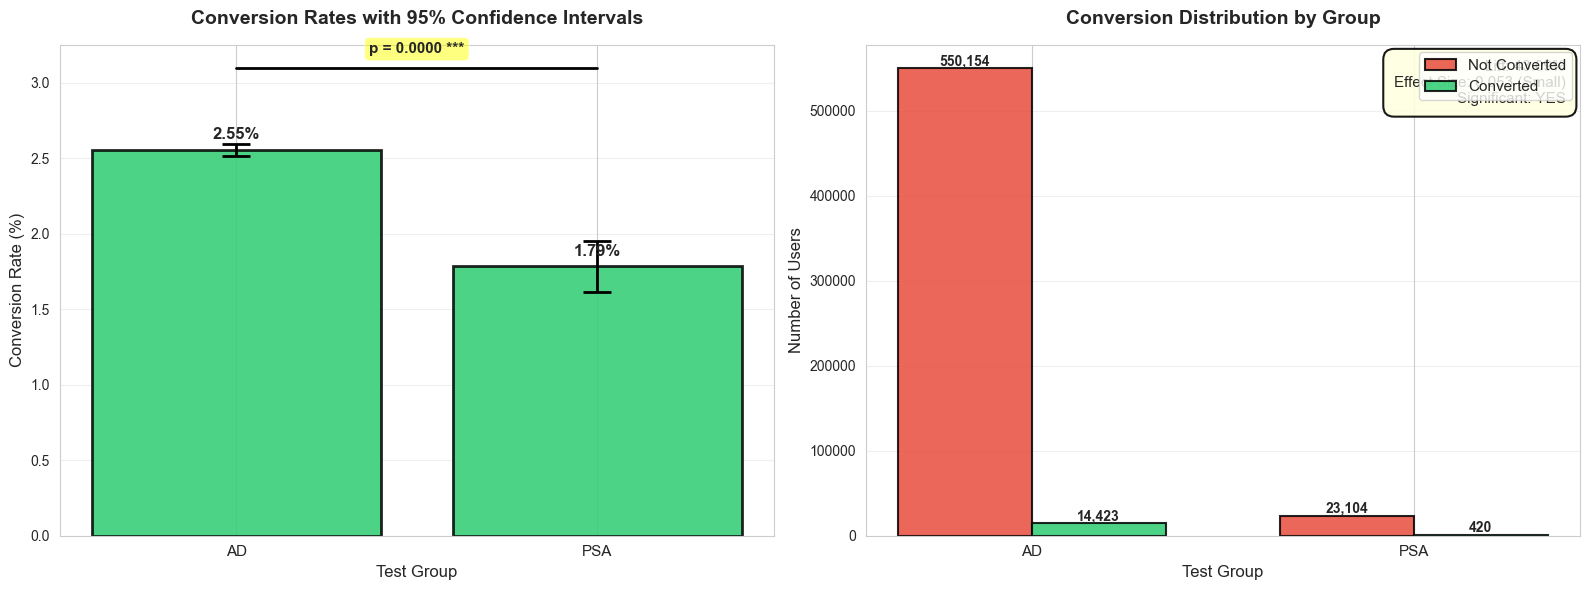

In [23]:
# Create comprehensive results visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Conversion Rate with Confidence Intervals
groups = ['ad', 'psa']
rates = [ad_rate * 100, psa_rate * 100]
ci_lower = [ad_ci[0] * 100, psa_ci[0] * 100]
ci_upper = [ad_ci[1] * 100, psa_ci[1] * 100]
errors = [[rates[i] - ci_lower[i] for i in range(2)], 
          [ci_upper[i] - rates[i] for i in range(2)]]

colors = ['#2ecc71' if p_value < 0.05 else '#95a5a6' for _ in groups]
bars = axes[0].bar(groups, rates, color=colors, alpha=0.85, edgecolor='black', linewidth=2)
axes[0].errorbar(groups, rates, yerr=errors, fmt='none', ecolor='black', 
                 capsize=10, capthick=2, linewidth=2)

axes[0].set_title('Conversion Rates with 95% Confidence Intervals', 
                  fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Test Group', fontsize=12)
axes[0].set_ylabel('Conversion Rate (%)', fontsize=12)
axes[0].set_xticklabels([g.upper() for g in groups], fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Add rate labels
for bar, rate in zip(bars, rates):
    axes[0].text(bar.get_x() + bar.get_width()/2., rate + 0.05,
                f'{rate:.2f}%', ha='center', va='bottom', 
                fontsize=12, fontweight='bold')

# Add significance indicator
if p_value < 0.05:
    y_max = max(ci_upper) + 0.5
    axes[0].plot([0, 1], [y_max, y_max], 'k-', linewidth=2)
    axes[0].text(0.5, y_max + 0.1, f'p = {p_value:.4f} ***',
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# Right: Conversion counts comparison
conversion_data = marketing_data.groupby(['test group', 'converted']).size().unstack(fill_value=0)
x = np.arange(len(conversion_data.index))
width = 0.35

bars1 = axes[1].bar(x - width/2, conversion_data[False], width, 
                    label='Not Converted', color='#e74c3c', alpha=0.85, edgecolor='black', linewidth=1.5)
bars2 = axes[1].bar(x + width/2, conversion_data[True], width, 
                    label='Converted', color='#2ecc71', alpha=0.85, edgecolor='black', linewidth=1.5)

axes[1].set_title('Conversion Distribution by Group', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Test Group', fontsize=12)
axes[1].set_ylabel('Number of Users', fontsize=12)
axes[1].set_xticks(x)
axes[1].set_xticklabels([g.upper() for g in conversion_data.index], fontsize=11)
axes[1].legend(fontsize=11, loc='upper right')
axes[1].grid(axis='y', alpha=0.3)

# Add count labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}', ha='center', va='bottom', 
                    fontsize=10, fontweight='bold')

# Add summary box
summary_text = f'Lift: {lift:.2f}%\n'
summary_text += f'Effect Size: {effect_size:.3f} ({magnitude})\n'
summary_text += f'Significant: {"YES" if p_value < 0.05 else "NO"}'
axes[1].text(0.98, 0.97, summary_text, transform=axes[1].transAxes,
            fontsize=11, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round,pad=0.7', facecolor='lightyellow', 
                     alpha=0.9, edgecolor='black', linewidth=1.5))

plt.tight_layout()
plt.show()

## 5. Conclusion

Based on the statistical analysis above:

1. **Hypothesis Test Results**: The p-value will tell us if we can reject the null hypothesis
2. **Effect Size**: Cohen's h measures the practical significance of the difference
3. **Confidence Intervals**: Show the range where the true conversion rates likely lie
4. **Business Impact**: The lift percentage shows the relative improvement from ads

**Decision Framework:**
- If p < 0.05: The difference is statistically significant
- If Cohen's h > 0.2: The effect size is meaningful
- If both conditions are met: Strong evidence that ads increase conversions

---

## 6. Additional Exploratory Data Analysis

### 6.1 Ad Exposure Analysis

In [24]:
# Analyze ad exposure (for ad group only)
print("="*70)
print("AD EXPOSURE ANALYSIS")
print("="*70)

# Get statistics for ad group
ad_exposure = ad_group['total ads'].describe()
print("\nTotal Ads Seen by Ad Group Users:")
print(ad_exposure)

# Compare ad exposure between converted and non-converted users
converted_ads = ad_group[ad_group['converted'] == True]['total ads']
not_converted_ads = ad_group[ad_group['converted'] == False]['total ads']

print(f"\nConverted users - Mean ads: {converted_ads.mean():.2f}, Median: {converted_ads.median():.2f}")
print(f"Not converted - Mean ads: {not_converted_ads.mean():.2f}, Median: {not_converted_ads.median():.2f}")

# Statistical test: Does ad exposure differ between converted/not converted?
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(converted_ads, not_converted_ads, alternative='two-sided')
print(f"\nMann-Whitney U test p-value: {p:.6f}")
if p < 0.05:
    print("[OK] Significant difference in ad exposure between groups")
else:
    print("[X] No significant difference in ad exposure")

print("="*70)

AD EXPOSURE ANALYSIS

Total Ads Seen by Ad Group Users:
count    564577.000000
mean         24.823365
std          43.750456
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

Converted users - Mean ads: 83.91, Median: 64.00
Not converted - Mean ads: 23.27, Median: 13.00

Mann-Whitney U test p-value: 0.000000
[OK] Significant difference in ad exposure between groups


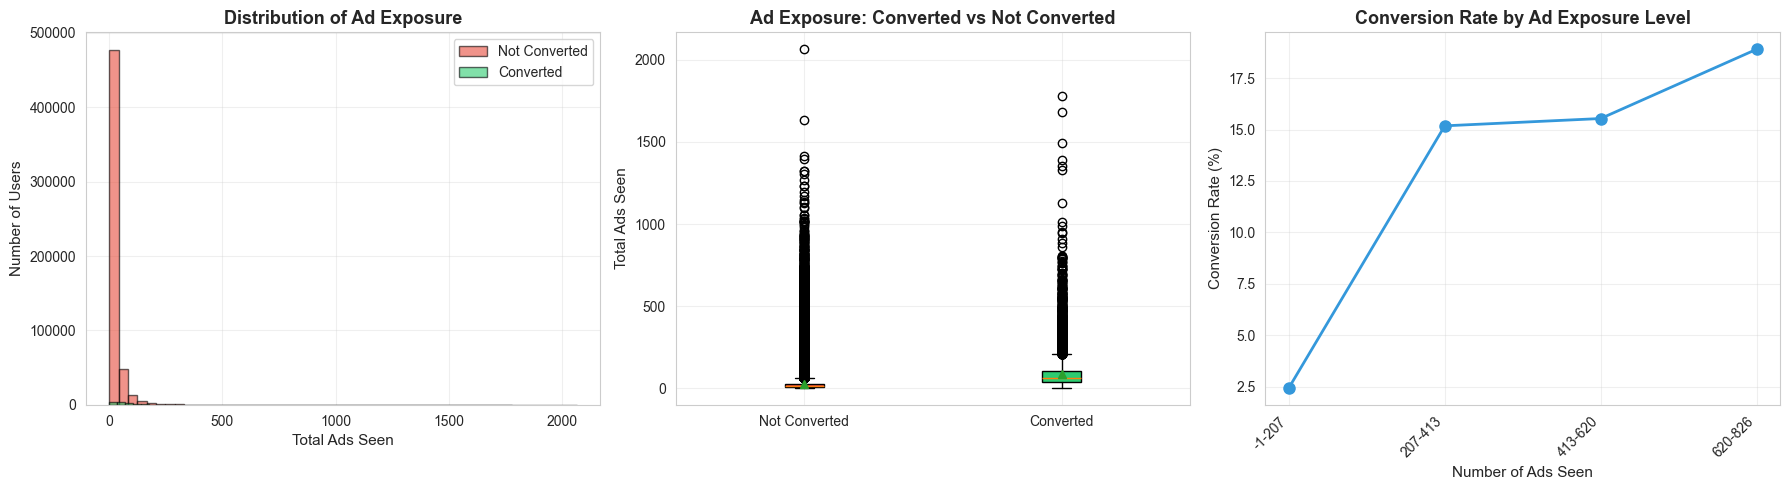


[INSIGHT] Insight: Users who converted saw 260.5% more ads on average


In [25]:
# Visualize ad exposure impact on conversion
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Distribution of total ads (converted vs not converted)
axes[0].hist(not_converted_ads, bins=50, alpha=0.6, label='Not Converted', color='#e74c3c', edgecolor='black')
axes[0].hist(converted_ads, bins=50, alpha=0.6, label='Converted', color='#2ecc71', edgecolor='black')
axes[0].set_title('Distribution of Ad Exposure', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Total Ads Seen', fontsize=11)
axes[0].set_ylabel('Number of Users', fontsize=11)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2: Box plot comparison
data_to_plot = [not_converted_ads, converted_ads]
bp = axes[1].boxplot(data_to_plot, labels=['Not Converted', 'Converted'], 
                      patch_artist=True, showmeans=True)
bp['boxes'][0].set_facecolor('#e74c3c')
bp['boxes'][1].set_facecolor('#2ecc71')
axes[1].set_title('Ad Exposure: Converted vs Not Converted', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Total Ads Seen', fontsize=11)
axes[1].grid(alpha=0.3)

# Plot 3: Conversion rate by ad exposure bins
ad_bins = pd.cut(ad_group['total ads'], bins=10)
conv_by_exposure = ad_group.groupby(ad_bins)['converted'].agg(['mean', 'count'])
conv_by_exposure = conv_by_exposure[conv_by_exposure['count'] > 100]  # Filter small bins

x_labels = [f"{int(interval.left)}-{int(interval.right)}" for interval in conv_by_exposure.index]
axes[2].plot(range(len(conv_by_exposure)), conv_by_exposure['mean'] * 100, 
             marker='o', linewidth=2, markersize=8, color='#3498db')
axes[2].set_title('Conversion Rate by Ad Exposure Level', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Number of Ads Seen', fontsize=11)
axes[2].set_ylabel('Conversion Rate (%)', fontsize=11)
axes[2].set_xticks(range(len(conv_by_exposure)))
axes[2].set_xticklabels(x_labels, rotation=45, ha='right')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Key insight
if converted_ads.mean() > not_converted_ads.mean():
    print(f"\n[INSIGHT] Insight: Users who converted saw {((converted_ads.mean() - not_converted_ads.mean()) / not_converted_ads.mean() * 100):.1f}% more ads on average")
else:
    print(f"\n[INSIGHT] Insight: Ad exposure doesn't appear to drive conversion directly")

### 6.2 Temporal Patterns Analysis

In [26]:
# Analyze conversion patterns by day of week
print("="*70)
print("TEMPORAL PATTERNS: DAY OF WEEK")
print("="*70)

# Conversion rate by day
day_conversion = marketing_data.groupby('most ads day').agg({
    'converted': ['sum', 'count', 'mean']
}).round(4)
day_conversion.columns = ['Converted', 'Total', 'Conversion Rate']
day_conversion['Conversion Rate %'] = (day_conversion['Conversion Rate'] * 100).round(2)

print("\nConversion by Day of Week:")
print(day_conversion.sort_values('Conversion Rate %', ascending=False))
print("="*70)

# Day order for proper visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
marketing_data['most ads day'] = pd.Categorical(marketing_data['most ads day'], 
                                                 categories=day_order, ordered=True)

TEMPORAL PATTERNS: DAY OF WEEK

Conversion by Day of Week:
              Converted  Total  Conversion Rate  Conversion Rate %
most ads day                                                      
Monday             2857  87073           0.0328               3.28
Tuesday            2312  77479           0.0298               2.98
Wednesday          2018  80908           0.0249               2.49
Sunday             2090  85391           0.0245               2.45
Friday             2057  92608           0.0222               2.22
Thursday           1790  82982           0.0216               2.16
Saturday           1719  81660           0.0211               2.11


In [27]:
# Analyze conversion patterns by hour of day
print("\n" + "="*70)
print("TEMPORAL PATTERNS: HOUR OF DAY")
print("="*70)

hour_conversion = marketing_data.groupby('most ads hour').agg({
    'converted': ['sum', 'count', 'mean']
}).round(4)
hour_conversion.columns = ['Converted', 'Total', 'Conversion Rate']
hour_conversion['Conversion Rate %'] = (hour_conversion['Conversion Rate'] * 100).round(2)

print("\nTop 5 Hours by Conversion Rate:")
print(hour_conversion.sort_values('Conversion Rate %', ascending=False).head())

print("\nBottom 5 Hours by Conversion Rate:")
print(hour_conversion.sort_values('Conversion Rate %', ascending=True).head())
print("="*70)


TEMPORAL PATTERNS: HOUR OF DAY

Top 5 Hours by Conversion Rate:
               Converted  Total  Conversion Rate  Conversion Rate %
most ads hour                                                      
16                  1156  37567           0.0308               3.08
20                   862  28923           0.0298               2.98
15                  1325  44683           0.0297               2.97
21                   867  29976           0.0289               2.89
17                   987  34988           0.0282               2.82

Bottom 5 Hours by Conversion Rate:
               Converted  Total  Conversion Rate  Conversion Rate %
most ads hour                                                      
2                     39   5333           0.0073               0.73
3                     28   2679           0.0105               1.05
1                     62   4802           0.0129               1.29
4                     11    722           0.0152               1.52
7              

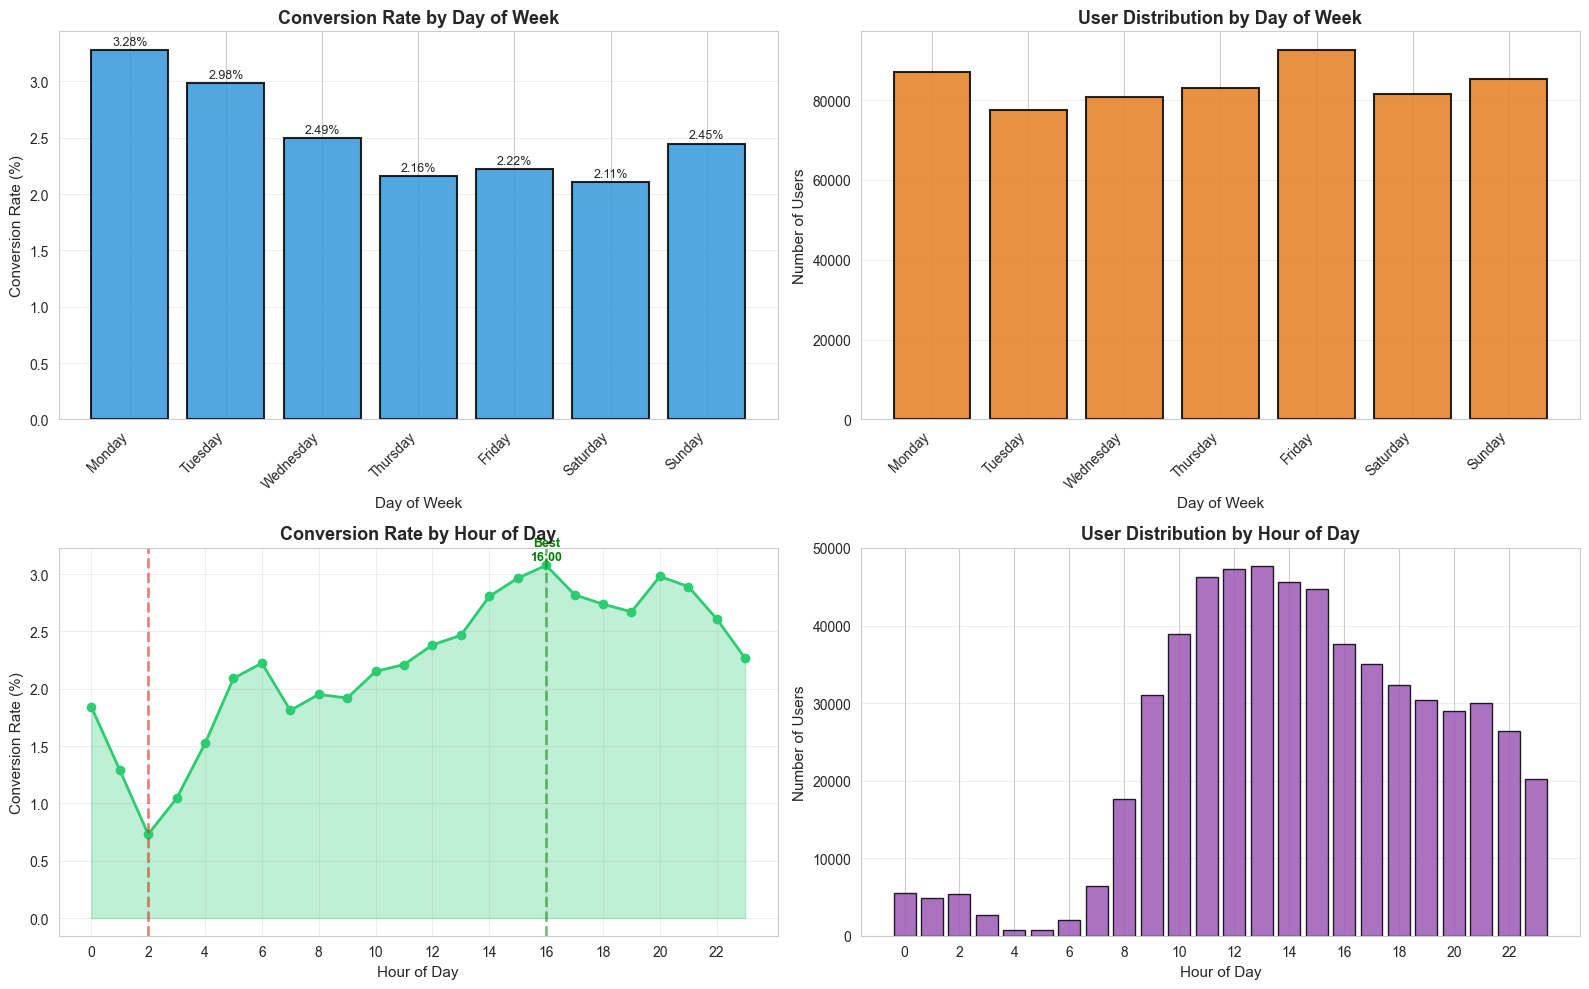


[INSIGHT] Best Day: Monday (3.28% conversion)
[INSIGHT] Best Hour: 16:00 (3.08% conversion)
[INSIGHT] Worst Hour: 2:00 (0.73% conversion)


In [28]:
# NOTE: Multiple groupby operations - results are computed efficiently
# Visualize temporal patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Conversion rate by day of week
day_conv_rate = marketing_data.groupby('most ads day')['converted'].mean() * 100
axes[0, 0].bar(range(len(day_conv_rate)), day_conv_rate.values, 
               color='#3498db', alpha=0.85, edgecolor='black', linewidth=1.5)
axes[0, 0].set_title('Conversion Rate by Day of Week', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('Day of Week', fontsize=11)
axes[0, 0].set_ylabel('Conversion Rate (%)', fontsize=11)
axes[0, 0].set_xticks(range(len(day_conv_rate)))
axes[0, 0].set_xticklabels(day_conv_rate.index, rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(day_conv_rate.values):
    axes[0, 0].text(i, v + 0.02, f'{v:.2f}%', ha='center', va='bottom', fontsize=9)

# Plot 2: User count by day of week
day_counts = marketing_data['most ads day'].value_counts().reindex(day_order)
axes[0, 1].bar(range(len(day_counts)), day_counts.values, 
               color='#e67e22', alpha=0.85, edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('User Distribution by Day of Week', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('Day of Week', fontsize=11)
axes[0, 1].set_ylabel('Number of Users', fontsize=11)
axes[0, 1].set_xticks(range(len(day_counts)))
axes[0, 1].set_xticklabels(day_counts.index, rotation=45, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Conversion rate by hour (line plot)
hour_conv_rate = marketing_data.groupby('most ads hour')['converted'].mean() * 100
axes[1, 0].plot(hour_conv_rate.index, hour_conv_rate.values, 
                marker='o', linewidth=2, markersize=6, color='#2ecc71')
axes[1, 0].fill_between(hour_conv_rate.index, hour_conv_rate.values, alpha=0.3, color='#2ecc71')
axes[1, 0].set_title('Conversion Rate by Hour of Day', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Hour of Day', fontsize=11)
axes[1, 0].set_ylabel('Conversion Rate (%)', fontsize=11)
axes[1, 0].set_xticks(range(0, 24, 2))
axes[1, 0].grid(alpha=0.3)

# Highlight best and worst hours
best_hour = hour_conv_rate.idxmax()
worst_hour = hour_conv_rate.idxmin()
axes[1, 0].axvline(best_hour, color='green', linestyle='--', alpha=0.5, linewidth=2)
axes[1, 0].axvline(worst_hour, color='red', linestyle='--', alpha=0.5, linewidth=2)
axes[1, 0].text(best_hour, hour_conv_rate.max() + 0.05, f'Best\n{best_hour}:00', 
                ha='center', fontsize=9, color='green', fontweight='bold')

# Plot 4: User distribution by hour (heatmap style)
hour_counts = marketing_data['most ads hour'].value_counts().sort_index()
axes[1, 1].bar(hour_counts.index, hour_counts.values, 
               color='#9b59b6', alpha=0.85, edgecolor='black', linewidth=1)
axes[1, 1].set_title('User Distribution by Hour of Day', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('Hour of Day', fontsize=11)
axes[1, 1].set_ylabel('Number of Users', fontsize=11)
axes[1, 1].set_xticks(range(0, 24, 2))
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print insights
print(f"\n[INSIGHT] Best Day: {day_conv_rate.idxmax()} ({day_conv_rate.max():.2f}% conversion)")
print(f"[INSIGHT] Best Hour: {best_hour}:00 ({hour_conv_rate.max():.2f}% conversion)")
print(f"[INSIGHT] Worst Hour: {worst_hour}:00 ({hour_conv_rate.min():.2f}% conversion)")

### 6.3 Test Group Comparison Across Time & Exposure

In [29]:
# NOTE: Multiple groupby operations - results are computed efficiently
# Compare ad vs psa conversion across different dimensions
print("="*70)
print("AD vs PSA: DIMENSIONAL COMPARISON")
print("="*70)

# By day of week
day_comparison = marketing_data.groupby(['most ads day', 'test group'])['converted'].mean().unstack() * 100
print("\nConversion Rate by Day (%):")
print(day_comparison.round(2))
print(f"\nAd group outperforms PSA on all days: {(day_comparison['ad'] > day_comparison['psa']).all()}")

# By hour of day - compare peak hours
hour_comparison = marketing_data.groupby(['most ads hour', 'test group'])['converted'].mean().unstack() * 100
peak_hours = hour_comparison.mean(axis=1).nlargest(5).index.tolist()
print(f"\nConversion Rate during Peak Hours ({peak_hours}):")
print(hour_comparison.loc[peak_hours].round(2))

print("="*70)

AD vs PSA: DIMENSIONAL COMPARISON

Conversion Rate by Day (%):
test group      ad   psa
most ads day            
Monday        3.32  2.26
Tuesday       3.04  1.44
Wednesday     2.54  1.58
Thursday      2.16  2.02
Friday        2.25  1.63
Saturday      2.13  1.40
Sunday        2.46  2.06

Ad group outperforms PSA on all days: True

Conversion Rate during Peak Hours ([16, 15, 18, 21, 19]):
test group       ad   psa
most ads hour            
16             3.09  2.81
15             2.98  2.52
18             2.75  2.52
21             2.92  2.22
19             2.68  2.45


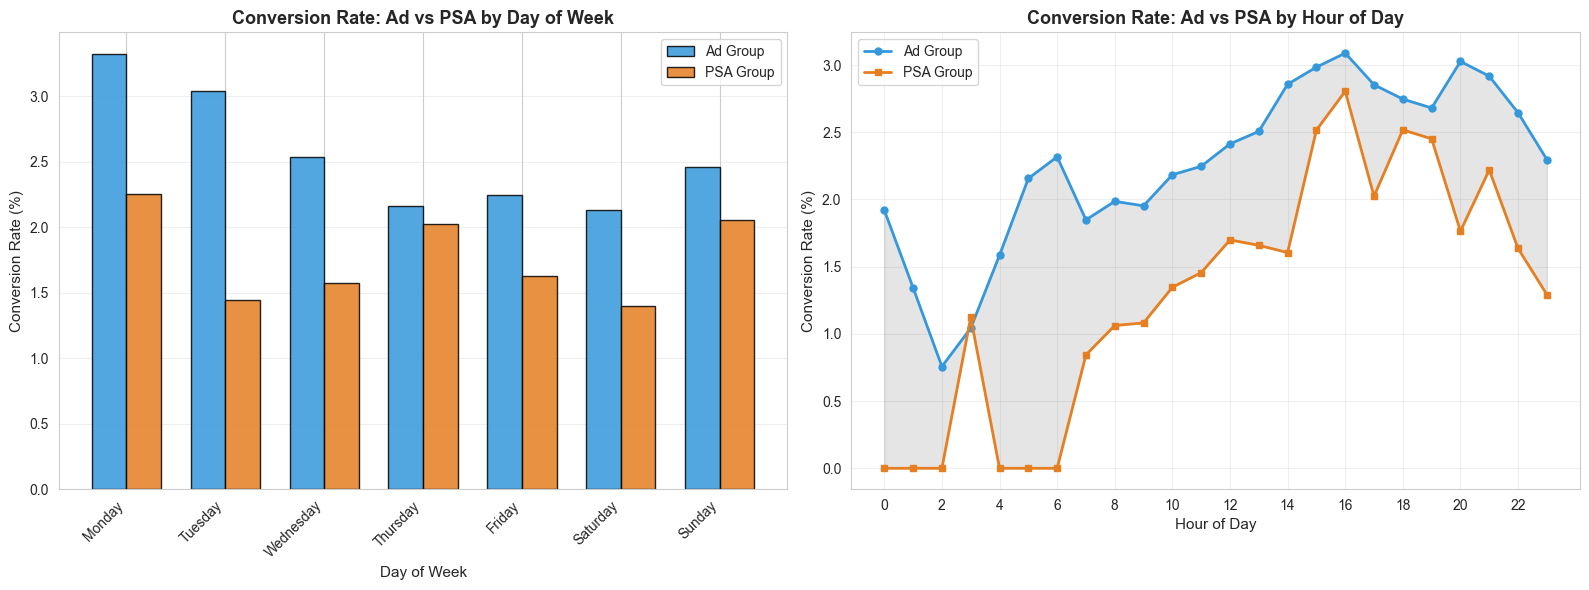


[INSIGHT] Ad group has higher conversion on 7/7 days (100.0%)
[INSIGHT] This shows consistent superiority across time


In [30]:
# Visualize ad vs psa across time dimensions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Conversion rate by day - ad vs psa
x = np.arange(len(day_comparison))
width = 0.35

bars1 = axes[0].bar(x - width/2, day_comparison['ad'], width, 
                    label='Ad Group', color='#3498db', alpha=0.85, edgecolor='black')
bars2 = axes[0].bar(x + width/2, day_comparison['psa'], width, 
                    label='PSA Group', color='#e67e22', alpha=0.85, edgecolor='black')

axes[0].set_title('Conversion Rate: Ad vs PSA by Day of Week', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Day of Week', fontsize=11)
axes[0].set_ylabel('Conversion Rate (%)', fontsize=11)
axes[0].set_xticks(x)
axes[0].set_xticklabels(day_comparison.index, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Conversion rate by hour - ad vs psa (smoothed line)
axes[1].plot(hour_comparison.index, hour_comparison['ad'], 
            marker='o', linewidth=2, markersize=5, label='Ad Group', color='#3498db')
axes[1].plot(hour_comparison.index, hour_comparison['psa'], 
            marker='s', linewidth=2, markersize=5, label='PSA Group', color='#e67e22')
axes[1].fill_between(hour_comparison.index, hour_comparison['ad'], 
                     hour_comparison['psa'], alpha=0.2, color='gray')

axes[1].set_title('Conversion Rate: Ad vs PSA by Hour of Day', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Hour of Day', fontsize=11)
axes[1].set_ylabel('Conversion Rate (%)', fontsize=11)
axes[1].set_xticks(range(0, 24, 2))
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate consistency
ad_wins = (day_comparison['ad'] > day_comparison['psa']).sum()
total_days = len(day_comparison)
print(f"\n[INSIGHT] Ad group has higher conversion on {ad_wins}/{total_days} days ({ad_wins/total_days*100:.1f}%)")
print(f"[INSIGHT] This shows {'consistent' if ad_wins/total_days > 0.8 else 'variable'} superiority across time")

### 6.4 Summary of Additional Insights

## 6.2 Final Decision & Action Items

Based on the complete analysis, this section provides the final recommendation and next steps for implementation.

---

## Appendix

### Methodology Notes

**Statistical Tests Used:**
1. **Two-Proportion Z-Test**: Tests if proportions from two groups are significantly different
2. **Chi-Square Test**: Tests independence between categorical variables
3. **Cohen's h**: Effect size measure for difference between proportions
4. **Mann-Whitney U Test**: Non-parametric test for comparing distributions

**Interpretation Guidelines:**
- **p-value < 0.05**: Reject null hypothesis (result is statistically significant)
- **Cohen's h < 0.2**: Small effect size
- **Cohen's h 0.2-0.5**: Medium effect size  
- **Cohen's h > 0.5**: Large effect size

### Assumptions & Limitations

1. **Random Assignment**: Assumes users were randomly assigned to groups
2. **Independence**: Assumes user behaviors are independent
3. **Sample Size**: Large sample provides good statistical power
4. **External Validity**: Results may vary with different ad creative, products, or audiences

### References

- Cohen, J. (1988). Statistical Power Analysis for the Behavioral Sciences
- Kohavi, R., & Longbotham, R. (2017). Online Controlled Experiments and A/B Testing
- Deng, A., et al. (2013). Improving the Sensitivity of Online Controlled Experiments

---

### Document Information

**Version:** 1.0  
**Last Updated:** January 2026  
**Contact:** Data Science Team  

---

**End of Analysis**

In [31]:
# Generate comprehensive summary
print("="*70)
print("COMPREHENSIVE INSIGHTS SUMMARY")
print("="*70)

print("\n1. PRIMARY FINDING:")
print(f"   - Ad group conversion rate: {ad_rate*100:.2f}%")
print(f"   - PSA group conversion rate: {psa_rate*100:.2f}%")
print(f"   - Lift from ads: {lift:.2f}%")
print(f"   - Statistical significance: p = {p_value:.6f}")

print("\n2. AD EXPOSURE IMPACT:")
avg_ads_converted = ad_group[ad_group['converted']]['total ads'].mean()
avg_ads_not_converted = ad_group[~ad_group['converted']]['total ads'].mean()
print(f"   - Converted users saw avg {avg_ads_converted:.1f} ads")
print(f"   - Non-converted users saw avg {avg_ads_not_converted:.1f} ads")

print("\n3. TEMPORAL INSIGHTS:")
best_day = day_conv_rate.idxmax()
best_hour = hour_conv_rate.idxmax()
print(f"   - Best day for conversion: {best_day} ({day_conv_rate[best_day]:.2f}%)")
print(f"   - Best hour for conversion: {best_hour}:00 ({hour_conv_rate[best_hour]:.2f}%)")

print("\n4. RECOMMENDATION:")
if p_value < 0.05:
    print("   [OK] IMPLEMENT THE AD CAMPAIGN")
    print(f"   - Statistically significant improvement: {lift:.2f}% lift")
    print(f"   - Optimize timing: Focus on {best_day}s around {best_hour}:00")
    if avg_ads_converted > avg_ads_not_converted:
        print(f"   - Increase ad frequency (sweet spot around {avg_ads_converted:.0f} ads)")
else:
    print("   [WARNING] AD CAMPAIGN NOT RECOMMENDED")
    print("   - No statistically significant improvement detected")
    print("   - Consider redesigning ads or targeting strategy")

print("="*70)

COMPREHENSIVE INSIGHTS SUMMARY

1. PRIMARY FINDING:
   - Ad group conversion rate: 2.55%
   - PSA group conversion rate: 1.79%
   - Lift from ads: 43.09%
   - Statistical significance: p = 0.000000

2. AD EXPOSURE IMPACT:
   - Converted users saw avg 83.9 ads
   - Non-converted users saw avg 23.3 ads

3. TEMPORAL INSIGHTS:
   - Best day for conversion: Monday (3.28%)
   - Best hour for conversion: 16:00 (3.08%)

4. RECOMMENDATION:
   [OK] IMPLEMENT THE AD CAMPAIGN
   - Statistically significant improvement: 43.09% lift
   - Optimize timing: Focus on Mondays around 16:00
   - Increase ad frequency (sweet spot around 84 ads)
